<a href="https://colab.research.google.com/github/poojithasaipri/Employee-burnout-prediction/blob/main/Employee_burnout_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Corrected spelling of train_test_split
from sklearn.preprocessing import StandardScaler  # Corrected spelling of StandardScaler
from sklearn.linear_model import LinearRegression  # Corrected space in linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle  # Corrected import statement for pickle
import os


In [7]:
data=pd.read_excel(r"/content/employee_burnout_analysis-AI.xlsx")

In [8]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [9]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [10]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [11]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [13]:
data.shape

(22750, 9)

In [14]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [15]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [16]:
data.isnull().sum().values.sum()

4622

In [17]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

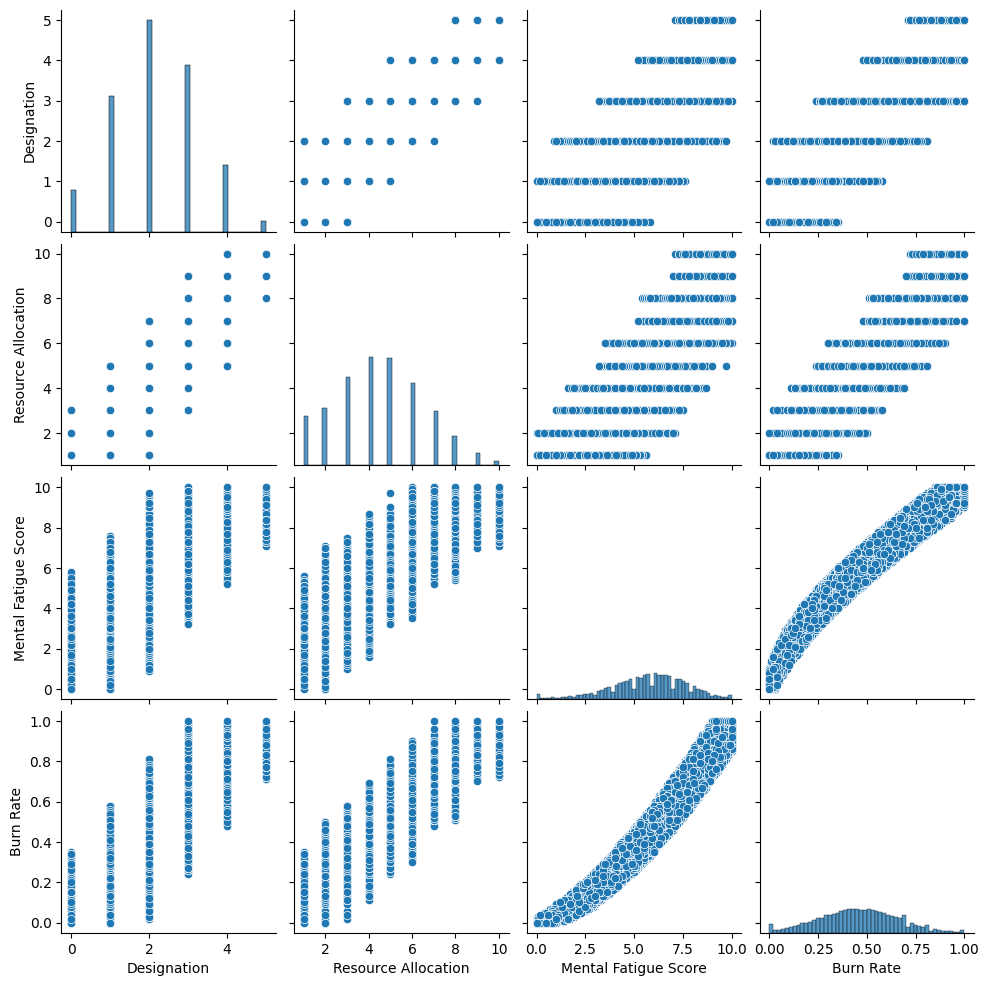

In [18]:
sns.pairplot(data)
plt.show()

In [50]:
import seaborn as sns
import plotly.express as px
corr=data.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig=px.imshow(corr, text_auto=True,aspect='auto')
fig.show()

In [19]:
data=data.dropna()

In [20]:
data.shape

(18590, 9)

In [21]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [22]:
for i,col in enumerate(data.columns):
  print(f"\n\n{data[col].unique()}")
  print(f"\n{data[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe32003400380032003900' ... 'fffe33003000350031003800'
 'fffe33003300320036003900' 'fffe3400350031003800']

Employee ID
fffe32003000360033003200    1
fffe350038003800            1
fffe3600320033003000        1
fffe32003900300030003100    1
fffe31003300350030003300    1
                           ..
fffe31003600380035003400    1
fffe3600350033003400        1
fffe32003500310039003100    1
fffe32003300330032003000    1
fffe3400350031003800        1
Name: count, Length: 18590, dtype: int64




<DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-11-03 00:00:00',
 '2008-07-24 00:00:00', '2008-11-26 00:00:00', '2008-01-02 00:00:00',
 '2008-10-31 00:00:00', '2008-03-16 00:00:00', '2008-05-12 00:00:00',
 '2008-05-14 00:00:00',
 ...
 '2008-11-06 00:00:00', '2008-02-10 00:00:00', '2008-11-13 00:00:00',
 '2008-12-10 00:00:00', '2008-12-03 00:00:00', '2008-01-05 00:00:00',
 '2008-02-01 00:00:00', '2008-07-02 00:00:00', '2008-

In [23]:
data=data.drop('Employee ID', axis=1)


In [24]:
print(f"Min date: {data['Date of Joining'].min()}")
print(f"Max date: {data['Date of Joining'].max()}")

# Create a copy of the DataFrame
data_month = data.copy()

# Convert 'Date of Joining' to datetime format
data_month["Date of Joining"] = pd.to_datetime(data_month['Date of Joining'])

# Group by month and count the number of entries per month
monthly_counts = data_month["Date of Joining"].groupby(data_month["Date of Joining"].dt.month).count()


Min date: 2008-01-01 00:00:00
Max date: 2008-12-31 00:00:00


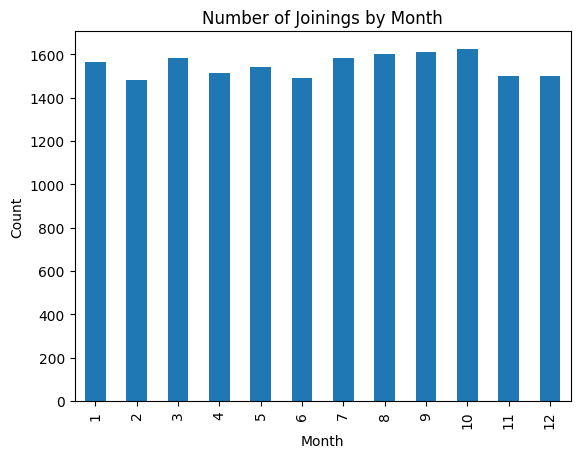

In [25]:
monthly_counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of Joinings by Month")
plt.show()

In [26]:
data_2008 = pd.to_datetime(["2008-01-01"] * len(data))

# Convert 'Date of Joining' to datetime format
data["Date of Joining"] = pd.to_datetime(data['Date of Joining'])

# Calculate the number of days since January 1st, 2008
data["Days"] = (data["Date of Joining"] - data_2008).dt.days

# Display the 'Days' column
print(data["Days"])

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64


In [27]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [28]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [29]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,273
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,334
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,307
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,205
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29,330


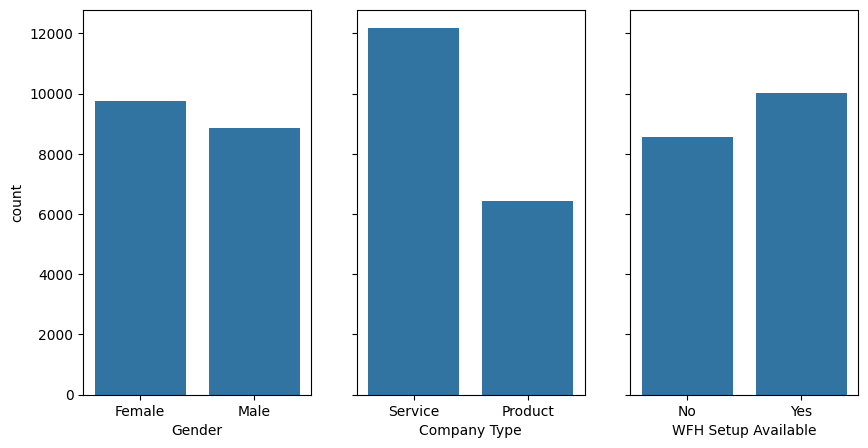

In [30]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
 sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

In [31]:
import plotly.express as px

# Print the column names to check if 'Date of Joining' exists
print(data.columns)

# If 'Date of Joining' is present in the columns, proceed with the following code
if 'Date of Joining' in data.columns:
    # Select numerical columns between 'Date of Joining' and 'Burn Rate'
    burn_st = data.loc[:, 'Date of Joining':'Burn Rate']
    burn_st = burn_st.select_dtypes(include=[int, float])

    # Plot distributions for each numerical column
    for col in burn_st.columns:
        fig = px.histogram(burn_st, x=col, title="Plot Distribution of " + col, color_discrete_sequence=['green'])
        fig.update_layout(bargap=0.2)
        fig.show()
else:
    print("Error: 'Date of Joining' column not found in the DataFrame.")


Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Days'],
      dtype='object')


In [32]:
import plotly.express as px

# Create a line plot
fig = px.line(data,y="Burn Rate",  color="Designation", title="Burn rate on the basis of Designation")

# Update the layout of the plot
fig.update_layout(bargap=0.1)

# Show the plot
fig.show()


In [33]:
fig = px.line(data,y="Burn Rate",  color="Mental Fatigue Score", title="Burn rate on the basis of Mental Fatigue Score ")

# Update the layout of the plot
fig.update_layout(bargap=0.1)

# Show the plot
fig.show()

In [49]:
import plotly.express as px

# Create a line plot
fig = px.line(data,y="Burn Rate",  color="Resource Allocation", title="Burn rate on the basis of Resource Allocation")

# Update the layout of the plot
fig.update_layout(bargap=0.1)

# Show the plot
fig.show()

In [35]:
data=data.drop(['Date of Joining','Days'], axis=1)

In [36]:
# Define the columns to check for existence
columns_to_check = ['Company Type', 'WFH Setup Available', 'Gender']

# Check if all columns exist in the DataFrame
if all(col in data.columns for col in columns_to_check):
    # Perform one-hot encoding
    data = pd.get_dummies(data, columns=columns_to_check, drop_first=True)
    encoded_columns = data.columns  # Store the encoded column names for later use
    print(data.head())  # Display the first few rows of the DataFrame after encoding
else:
    # Print an error message if any of the specified columns are missing
    print("Error: One or more of the specified columns are not present in the DataFrame.")

    # Add debugging steps here to investigate why the columns are missing
    # For example, print the existing columns in the DataFrame
    print("Existing columns in the DataFrame:")
    print(data.columns)


   Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0            2                  3.0                   3.8       0.16   
1            1                  2.0                   5.0       0.36   
3            1                  1.0                   2.6       0.20   
4            3                  7.0                   6.9       0.52   
5            2                  4.0                   3.6       0.29   

   Company Type_Service  WFH Setup Available_Yes  Gender_Male  
0                  True                    False        False  
1                  True                     True         True  
3                  True                     True         True  
4                  True                    False        False  
5                 False                     True         True  


In [37]:
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)  # Corrected axis parameter to 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [38]:
import os
import pickle

In [39]:

 scaler_filename ='../models/scaler.pkl'
# Create the 'models' directory if it doesn't exist
 os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)
 # Use pickle to save the scaler to the file
 with open(scaler_filename, 'wb') as scaler_file:
  pickle.dump(scaler, scaler_file)

In [40]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [41]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

In [42]:
import os
import pickle

# Saving the processed data
path = '../data/processed/'

# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)

# Saving X_train and y_train to CSV files
X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)


In [43]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [44]:
print("Linear Regression Model Performance Metrics:\n")
y_pred = linear_model.predict(X_test)

Linear Regression Model Performance Metrics:



In [45]:
mse= mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r2=r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0031569779113610717
Mean Absolute Error: 0.04595032032644773
R-squared: 0.918822674247248


In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 91.8822674247248
